In [1]:
# CLUSTER K-MEANS ALGORITHM SELECTING THE NUMBER OF CLUSTER THROUGH ELBOW POINT

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


Text(0, 0.5, 'Income')

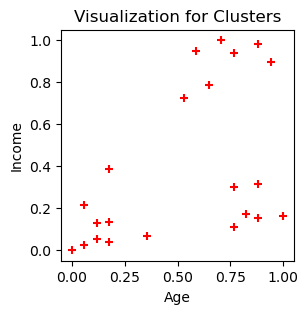

In [5]:
plt.figure(figsize=(3,3))
plt.scatter(df.Age, df['Income($)'], marker='+', color='red')
plt.title('Visualization for Clusters')
plt.xlabel("Age")
plt.ylabel("Income")

In [6]:
km = KMeans()
clusters = km.fit_predict(df[['Age', 'Income($)']])

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
df['clusters'] = clusters
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,5
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,3


In [8]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]
df3 = df[df.clusters == 3]
df4 = df[df.clusters == 4]
df5 = df[df.clusters == 5]
df6 = df[df.clusters == 6]
df7 = df[df.clusters == 7]

Text(0, 0.5, 'Income')

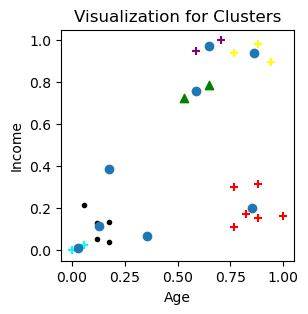

In [9]:
plt.figure(figsize=(3,3))
plt.title('Visualization for Clusters')
plt.scatter(df0.Age, df0['Income($)'], marker='+', color='red')
plt.scatter(df1.Age, df1['Income($)'], marker='.', color='black')
plt.scatter(df2.Age, df2['Income($)'], marker='^', color='green')
plt.scatter(df3.Age, df3['Income($)'], marker='+', color='yellow')
plt.scatter(df4.Age, df4['Income($)'], marker='+', color='blue')
plt.scatter(df5.Age, df5['Income($)'], marker='+', color='gray')
plt.scatter(df6.Age, df6['Income($)'], marker='+', color='purple')
plt.scatter(df7.Age, df7['Income($)'], marker='+', color='cyan')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.xlabel("Age")
plt.ylabel("Income")

In [10]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df[['Age', 'Income($)']])

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
df['clusters'] = clusters
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [12]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]

Text(0, 0.5, 'Income')

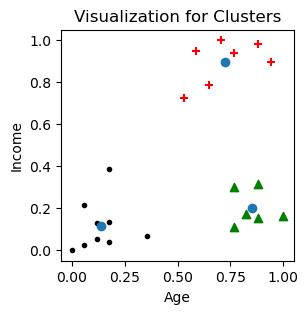

In [13]:
plt.figure(figsize=(3,3))
plt.title('Visualization for Clusters')
plt.scatter(df0.Age, df0['Income($)'], marker='+', color='red')
plt.scatter(df1.Age, df1['Income($)'], marker='.', color='black')
plt.scatter(df2.Age, df2['Income($)'], marker='^', color='green')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])
plt.xlabel("Age")
plt.ylabel("Income")

In [14]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit_predict(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

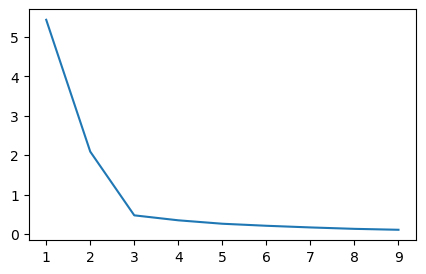

In [15]:
plt.figure(figsize=(5,3))
plt.plot(range(1, 10), sse)

In [16]:
km.cluster_centers_

array([[1.        , 0.16239316],
       [0.10084034, 0.08485958],
       [0.68627451, 0.96296296],
       [0.82352941, 0.30769231],
       [0.82352941, 0.14529915],
       [0.58823529, 0.75641026],
       [0.17647059, 0.38461538],
       [0.35294118, 0.06837607],
       [0.91176471, 0.94017094]])